# Curve fitting
In this notebook:
- We discuss Lagrange's interpolation theorem on finding polynomials that interpolate a set of points in the plane.
- We discuss polynomial regression, which is a method of fitting a polynomial to a set of points in the plane.
- We discuss the bias-variance tradeoff in regression problems, and discuss the concept of over-fitting and under-fitting. 

### Introduction
Suppose we have a regression problem with one variable $X$ and one target $Y$, both continuous variables. Assume that there are $m$ instances $(x_i,y_i)$, $i=1,\ldots,m$, of the variables. 
Recall that in our parametric ML framework, we assume the following: There exists a class of functions $\{f_{\mathbf{w}}\}$ (called a *model*), parameterized by a vector of parameters $\mathbf{w} \in \mathbb{R}^n$, such that for some particular choice of $(\mathbf{w})$, the relationship between $X$ and $Y$ can be modeled as
\begin{equation*}
    Y = f_{\mathbf{w}}(X) + \epsilon,
\end{equation*}
where $\epsilon$ is a random variable representing noise in the data.

For example, in the case of simple linear regression, the parameters are a pair $\mathbf{w} = (w_0,w_1) \in \mathbb{R}^2$, and the model is $f_{\mathbf{w}}(x) = w_0 + w_1x$. The particular choice of $\mathbf{w}$ giving the best model (according to some choice of loss function) is the "line of best fit". 

It is possible to also use higher order polynomials to model the relationship between $X$ and $Y$. For example, we could use a quadratic model $f_{\mathbf{w}}(x) = w_0 + w_1x + w_2x^2$, or a cubic model $f_{\mathbf{w}}(x) = w_0 + w_1x + w_2x^2 + w_3x^3$, and so on. Such a model is then called a **polynomial regression** model. Before we discuss this in detail, we first discuss the concept of interpolation and compare it to regression.

### Interpolation
As above, let's suppose we have a collection of data points $(x_i,y_i) \in \mathbb{R}^2$, $i=1,\ldots,m$. The goal of *interpolation* is to find a function $f(x)$ that passes through all the points *exactly* (without any error or noise term). In other words, we want to find a function $f(x)$ such that $f(x_i) = y_i$ for all $i=1,\ldots,m$. Of course, this is doomed to fail if the same $x$-value occurs more than once with different associated $y$-values. For simplicity, let's suppose for now that all $x_i$ are distinct.

There are many ways to interpolate a set of points, corresponding to the choice of the class of functions used. For this to make sense (i.e. be guaranteed to work), we need a class of functions that is "rich enough" to interpolate any set of points. Here are three commonly used classes with this "universal interpolator" property:
- Polynomials
- Piece-wise linear functions
- Splines (piece-wise polynomials)

### Polynomial interpolation
Of the three classes, the most natural (perhaps, because they are smooth?) are polynomials. We recall here that for a polynomial $f(x) = \sum_{i=0}^n a_ix^i$, with $a_n \neq 0$, the **degree** (or **order**) of $f(x)$ is the largest non-zero power of $x$ which appears, namely, $n$. Thus degree $0$ means a constant function, degree $1$ means a linear function, degree $2$ means a quadratic function, and so on.

Now, suppose we have a degree $n$ polynomial
\begin{equation*}
    f_{\mathbf{w}}(x) = w_0 + w_1x + w_2x^2 + \dotsb + w_nx^n.
\end{equation*}
Given a data point $(x_i,y_i)$, asking for this polynomial to pass through this data point means we must have
\begin{equation*}
    y_i = f_{\mathbf{w}}(x_i) = w_0 + w_1x_i + w_2x_i^2 + \dotsb + w_nx_i^n.
\end{equation*}
Now, recall that the main principle/take-away from linear algebra is that whenever you see a sum of products, you should immediately try to express it as a dot product. In this case, we can re-write the above equation as
\begin{equation*}
    y_i = \begin{bmatrix} \; 1 & x_i & \dotsb & x_i^n \; \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{bmatrix} = \mathbf{r}_i^T\mathbf{w}.
\end{equation*}
Thus, the polynomial interpolation problem can be re-stated as follows: Given a set of data points $(x_i,y_i)$, $i=1,\ldots,m$, find a vector $\mathbf{w} \in \mathbb{R}^{n+1}$ such that
\begin{equation*}
    \begin{bmatrix}
        1 & x_1 & \dotsb & x_1^n \\
        \vdots & \vdots & \ddots & \vdots \\
        1 & x_m & \dotsb & x_m^n
    \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{bmatrix} =  \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix}.
\end{equation*}
Thus, solving this equation amounts to solving a system of $m$ linear equations in $n+1$ unknowns. This leads to 3 cases:
1. If $m < n+1$, then the system is said to be *under-determined*, and there are infinitely many solutions. (In fact this is not super obvious, and it requires us to know that the rows of the matrix are linearly independent.)
2. If $m > n+1$, then the system is said to be *over-determined*, and there are no solutions (in general). In this case, we can try to find the "closest approximation" to a solution, which is the idea behind regression!
3. If $m=n+1$, then there always exists (provided all $x_i$'s are distinct) a *unique* solution. Writing this out in terms of the polynomial, this is known as: 

**Lagrange's interpolation theorem**: 
*Given a set of $m$ points $(x_i,y_i)$, $i=1,\dotsc,m$, with all $x_i$'s distinct, there exists a **unique** polynomial of degree at most $m-1$ that passes through all the points.*

In your HW 2, you will walk through a guided proof of this beautiful theorem. 

Below, let's see how to implement polynomial interpolation in Python using `polyfit` method from `numpy`.

           9             8             7             6             5
2.722e-19 x - 1.243e-18 x - 1.386e-17 x + 5.281e-17 x + 2.209e-16 x
              4     3             2
 - 4.881e-16 x + 1 x + 1.221e-15 x - 1 x - 1


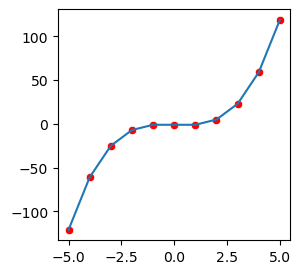

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a 1D array of numbers from 0 to 9
xs = np.arange(-5,6)

# 2. Create an array of ys by applying f(x) = x^2 - 4x - 10 to xs
ys = xs**3 - xs - 1

# 3. Compute an interpolant using polyfit
coeffs = np.polyfit(xs, ys, deg=9)

# 4. Make polynomial object
poly = np.poly1d(coeffs)

# 5. Print the polynomial
print(poly)

# 6. Plot the points and the polynomial
plt.figure(figsize=(3,3))
sns.scatterplot(x=xs, y=ys, color='red')
sns.lineplot(x=xs, y=poly(xs))
plt.show()


As we can see above, we did not get back the polynomial $x^3 - x -1$ that we originally used to generate the data. However, we came exceedingly close (because all the other coefficients are almost equal to zero). To rectify this issue, let's write a custom function to perform polynomial interpolation and round the coefficients to `round` decimal places.

In [20]:
def rounded_polyfit(x, y, deg, round_to=6):
    """
    Fit a polynomial to the data and round the coefficients to a specified number of decimal places (default = 6). Returns a polynomial object.
    """
    coeffs = np.polyfit(x, y, deg=deg)
    rounded_coeffs = np.round(coeffs, round_to)
    return np.poly1d(rounded_coeffs)

# 7. Compute an interpolant using rounded_polyfit
rounded_poly = rounded_polyfit(xs, ys, deg=9)

# 8. Print the polynomial
print(rounded_poly)

   3
1 x - 1 x - 1


### Polynomial regression
In polynomial regression, we fit a polynomial to a set of points $(x_i,y_i)$, $i=1,\ldots,m$, by minimizing the sum of squared errors. In other words, we choose a degree $n$ and find the polynomial $f_{\mathbf{w}}(x)$ of degree $n$ that minimizes the MSE loss function. Thus, our model parameters are the coefficients of the polynomial:
\begin{equation*}
    \mathbf{w} = \begin{bmatrix} \; w_0 & w_1 & \dotsb & w_n \; \end{bmatrix}^T \in \mathbb{R}^{n+1}.
\end{equation*}
The loss function is therefore defined by
\begin{align*}
    J(\mathbf{w}; \mathbf{x},\mathbf{y}) & = \frac{1}{m} \sum_{i=1}^m \left( y_i - f_{\mathbf{w}}(x_i) \right)^2 \\
    & = \frac{1}{m} \sum_{i=1}^m \left( y_i - \sum_{j=0}^n w_jx_i^j \right)^2.
\end{align*}
Above, we've included the columns $\mathbf{x}$ and $\mathbf{y}$ of the labelled dataset to emphasize that the loss function depends on the given data.

Then, fitting the polynomial to the data amounts to finding the optimal parameters $\hat{\mathbf{w}} \in \mathbb{R}^{n+1}$ that minimize the loss function on the data:
\begin{equation*}
    \hat{\mathbf{w}} = \argmin_{\mathbf{w} \in \mathbb{R}^{n+1}} J(\mathbf{w};\mathbf{x},\mathbf{y}).
\end{equation*}


### Linearity of polynomial regression
It is important to note that polynomial regression is a linear regression problem (preceded by some data manipulation). This is because the model is linear in the parameters $\mathbf{w}$, even though it is non-linear in the input variable $x$. Thus, one can think of a degree $n$ polynomial regression model as consisting of two steps:
1. Use the single feature column $\mathbf{x}$ to create $n+1$ feature columns $\mathbf{1}, \mathbf{x}, \mathbf{x}^2, \dotsc, \mathbf{x}^n$, where
\begin{equation*}
    \mathbf{x}^j = \begin{bmatrix} \; x_1^j & \dotsb & x_m^j \; \end{bmatrix}^T \in \mathbb{R}^m.
\end{equation*}
These columns comprise an augmented design matrix $\mathbf{X} \in \mathbb{R}^{m \times (n+1)}$. 
2. Perform multiple linear regression on the labelled dataset $(\mathbf{X},\mathbf{y})$ to find the optimal parameters $\hat{\mathbf{w}}$ as usual. 

Let's demonstrate this below by writing a custom polynomial regression class which uses `LinearRegression` from `sklearn` to perform the regression after creating the augmented design matrix.

In [ ]:
from sklearn.linear_model import LinearRegression
class MyPolynomialRegression:
    def __init__(self, deg=1):
        self.deg = deg
        self.poly = None

    def fit(self, x, y):
        # create augmented x matrix with powers of x up to deg
        X_train = np.vander(x, self.deg+1, increasing=True)

        # create linear regression object
        model = LinearRegression()

        # fit the model
        model.fit(X_train, y)

        # store the model
        self.poly = model
    
    def predict(self, x):
        # create new augmented x matrix for prediction
        X_pred = np.vander(x, self.deg+1, increasing=True)
        return self.poly.predict(X_pred)
    


# use a degree 8 polynomial to generate 100 random points in the range -5 to 5
np.random.seed(0)
x = np.random.uniform(-5, 5, 100)
y = x**8 - x**7 - x**5 - x**3 - 1 + np.random.normal(0, 1, 100)

# for degrees 1,..., 10, fit a polynomial to the data using MyPolynomialRegression and np.polyfit. Store the polys in separate dictionaries
polys_mypolyreg = {}
polys_polyfit = {}

for deg in range(1, 11):
    # create MyPolynomialRegression object
    model = MyPolynomialRegression(deg=deg)

    # fit the model
    model.fit(x, y)

    # store the model
    polys_mypolyreg[deg] = model

    # fit a polynomial using np.polyfit
    coeffs = np.polyfit(x, y, deg=deg)
    
    # store the polynomial object
    polys_polyfit[deg] = np.poly1d(coeffs)


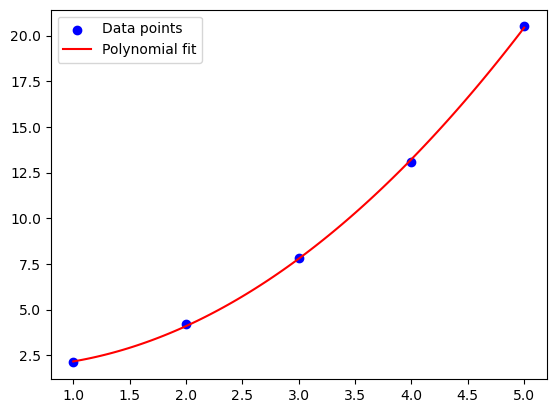

Coefficients: [ 0.         -0.70142857  0.87857143]
Intercept: 1.9800000000000022


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Example data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape for sklearn
y = np.array([2.1, 4.2, 7.8, 13.1, 20.5])

# Create polynomial regression model
# degree=n for nth degree polynomial
model = make_pipeline(
    PolynomialFeatures(degree=2),  # transforms X to polynomial features
    LinearRegression()             # performs the regression
)

# Fit the model
model.fit(X, y)

# Make predictions
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Polynomial fit')
plt.legend()
plt.show()

# Get coefficients
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

### Lagrange's interpolation theorem
Closely related to regression is the concept of **interpolation**, which is the process of finding a function that passes through a set of points. That is, interpolation is the process of finding a function $f$ such that $f(x_i) = y_i$ for all $i=1,\ldots,m$, with no error term $\epsilon$. 

Of course, this is doomed to fail if the same $x$-value occurs more than once with different associated $y$-values. For simplicity, let's suppose for now that all $x_i$ are distinct.

Then, an immediate question that arises is: given the data points $(x_i,y_i) \in \mathbb{R}^2$, $i=1,\ldots,m$, can we always find a function (smooth, let's say) that passes through all the points? A positive (and in fact, very precise) answer is furnished by **Lagrange's interpolation theorem**, which says the following: *There exists a **unique** polynomial of degree at most $m-1$ that passes through all the points $(x_i,y_i)$, $i=1,\ldots,m$.*



In [52]:
import numpy as np
import pandas as pd
from itertools import combinations

def build_interpolants(X, Y):
    """
    Given two Series X and Y (each of length n), return a dictionary mapping
    each subset of points to the coefficients of the unique interpolating
    polynomial (degree m-1) through those points.
    
    Raises a ValueError if any two x-values are identical.
    
    Parameters:
      X, Y: pandas.Series (floats), both of length n
            Each row corresponds to a point (x,y).
    
    Returns:
      A dict: 
         Keys are tuples of indices (the chosen subset);
         Values are lists of polynomial coefficients (highest degree first).
    """
    
    # Convert to numpy arrays for faster indexing
    X_arr = X.to_numpy()
    Y_arr = Y.to_numpy()
    n = len(X_arr)
    
    # 1. Check for duplicate x-values
    if len(set(X_arr)) < n:
        raise ValueError("Duplicate x-values detected. Interpolation not possible.")
    
    # 2. Build a dictionary of interpolants
    interpolants = {}
    
    # 3. For each subset size m
    for m in range(1, n + 1):
        # 4. For each m-element subset
        for subset in combinations(range(n), m):
            xs = X_arr[list(subset)]
            ys = Y_arr[list(subset)]
            
            # 5. Compute coefficients of the degree (m-1) polynomial, round to 6 decimals
            coeffs = np.polyfit(xs, ys, m - 1)
            coeffs = np.round(coeffs, 6)
            # 6. Store them in the dictionary with tuple(subset) as the key
            interpolants[tuple(subset)] = list(coeffs)
    
    # 7. Return the dictionary
    return interpolants

In [66]:
def random_poly(degree):
    """Generate a random monic polynomial of given degree, with integer coefficients between -10 and 10.
    """
    coeffs = np.random.randint(-10, 11, size=degree+1)
    coeffs[0] = 1  # Ensure the leading coefficient is 1
    return np.poly1d(coeffs)

def random_points(n,f):
    """Generate n random x-values uniformly from [0,1) and compute corresponding y-values using the polynomial f. Return two Series of length n containing the x and y values.
    """
    X = np.random.rand(n)
    return pd.Series(X), pd.Series(f(X))

# generate a random test case
np.random.seed(42)
n = 5
f = random_poly(n-1)
X = pd.Series(np.random.rand(n))
Y = pd.Series(f(X))
result_dict = build_interpolants(X, Y)

In [54]:
for m in range(1, n + 1):
    print(f"m = {m}")
    # for each subset of size m, print the coefficients
    for subset in combinations(range(len(X)), m):
        print(subset, result_dict[subset])

m = 1
(0,) [np.float64(0.493002)]
(1,) [np.float64(-2.86786)]
(2,) [np.float64(-2.867907)]
(3,) [np.float64(-2.98473)]
(4,) [np.float64(6.412661)]
m = 2
(0, 1) [np.float64(7.59277), np.float64(-4.052474)]
(0, 2) [np.float64(7.592461), np.float64(-4.052289)]
(0, 3) [np.float64(6.433397), np.float64(-3.358405)]
(0, 4) [np.float64(22.128103), np.float64(-12.754174)]
(1, 2) [np.float64(1.920368), np.float64(-3.167473)]
(1, 3) [np.float64(1.193342), np.float64(-3.054044)]
(1, 4) [np.float64(13.068257), np.float64(-4.906752)]
(2, 3) [np.float64(1.193163), np.float64(-3.054033)]
(2, 4) [np.float64(13.067879), np.float64(-4.906424)]
(3, 4) [np.float64(11.629103), np.float64(-3.66019)]
m = 3
(0, 1, 2) [np.float64(12.81424), np.float64(-2.077844), np.float64(-2.8556)]
(0, 1, 3) [np.float64(11.83819), np.float64(-1.341241), np.float64(-2.946765)]
(0, 1, 4) [np.float64(20.46776), np.float64(-7.85378), np.float64(-2.140747)]
(0, 2, 3) [np.float64(11.83795), np.float64(-1.341084), np.float64(-2.9467

In [56]:
# check whether the coefficients for m=1 match Y
for i in range(n):
    assert np.isclose(result_dict[(i,)][0], Y[i]), f"Failed for subset {(i,)}"

In [55]:
# check whether the coefficients for m=1 match Y
for i in range(n):
    assert (result_dict[(i,)][0] == Y[i]), f"Failed for subset {(i,)}"

AssertionError: Failed for subset (0,)

In [57]:
# check whether the coefficients for m=5 match the original polynomial
assert np.all(np.isclose(result_dict[tuple(range(n))], f)), "Failed for subset of all points"

In [58]:
result_dict[tuple(range(n))]

[np.float64(1.0),
 np.float64(9.0),
 np.float64(4.0),
 np.float64(0.0),
 np.float64(-3.0)]

In [63]:
for i in range(n):
    print(result_dict[(i,)][0] - Y[i])

-3.3386923953271364e-07
2.1774736147506246e-07
-4.6278055920723205e-07
1.808186138596568e-07
2.643047523065434e-07


In [68]:
from manim import *
import numpy as np
import pandas as pd
from itertools import combinations

class InterpolationAnimation(Scene):
    def construct(self):
        # 1. Parameter validation
        n = 5  # Example value, modify as needed
        if not isinstance(n, int) or n <= 0:
            raise ValueError("n must be a positive integer")

        # 2. Generate random polynomial
        f = random_poly(n-1)
        
        # 3. Generate random points
        X, Y = random_points(n, f)
        
        # 4. Create and fade in axes
        axes = Axes(
            x_range=[-1,2],
            y_range=[-10, 10],
            axis_config={"color": BLUE},
        ).add_coordinates()
        
        self.play(FadeIn(axes))
        
        # 5. Create and fade in points
        dots = VGroup(*[
            Dot(axes.c2p(x, y), color=RED)
            for x, y in zip(X, Y)
        ])
        self.play(FadeIn(dots))
        
        # 6. Create degree equation
        degree_text = MathTex("\\text{degree} =").to_corner(UR)
        self.play(Write(degree_text))
        
        # 7. Get interpolation dictionary
        interp_dict = build_interpolants(X, Y)
        
        # 8-12. Main animation loop
        for m in range(1, n+1):
            # Update degree number
            degree_num = MathTex(str(m)).next_to(degree_text, RIGHT)
            self.play(Write(degree_num))
            
            # Get all m-element subsets
            subsets = list(combinations(range(n), m))
            time_per_poly = 3 / len(subsets)  # Total 3 seconds per m
            
            # Animate each polynomial for this m
            for subset in subsets:
                coeffs = interp_dict[tuple(subset)]
                p = np.poly1d(coeffs)
                
                # Create graph
                x_vals = np.linspace(-5, 5, 100)
                y_vals = p(x_vals)
                graph = axes.plot(
                    lambda x: p(x),
                    x_range=[-5, 5],
                    color=YELLOW
                )
                
                # Highlight selected points
                selected_dots = VGroup(*[
                    dots[i].copy().set_color(YELLOW)
                    for i in subset
                ])
                
                # Animate polynomial and point highlighting
                self.play(
                    Create(graph),
                    Transform(dots, selected_dots),
                    run_time=time_per_poly
                )
                
                # Remove polynomial
                self.remove(graph)
                
            # Reset points to original color
            self.play(
                dots.animate.set_color(RED)
            )
            
            # Pause for 2 seconds
            self.wait(2)
            
            # Remove degree number for next iteration
            self.remove(degree_num)

        # Final pause
        self.wait(1)

# To run the animation, use the following command in the terminal:
%manim -ql -v WARNING InterpolationAnimation

Manim Community v0.19.0